<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-geomechanics/blob/master/delft%20course%20dr%20weijermars/stress_tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Introduction to vectors

Plot vector that has notation (2,4,4). Another vector has notation (1,2,3). Find the direction cosines of each vector, the angles of each vector to the three axes, and the angle between the two vectors!

(-4.0, 4.0)

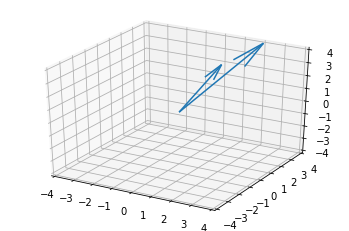

In [2]:
from mpl_toolkits.mplot3d import axes3d

X = np.array((0, 0))
Y= np.array((0, 0))
Z = np.array((0, 0))
U = np.array((2, 1))
V = np.array((4, 2))
W = np.array((4, 3))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])

In [3]:
# vector A and B
A_mag = np.sqrt(((U[0] - X[0])**2) + ((V[0] - Y[0])**2) + ((W[0] - Z[0])**2))
print('Magnitude of vector A:', A_mag, 'units')
B_mag = np.sqrt(((U[1] - X[1])**2) + ((V[1] - Y[1])**2) + ((W[1] - Z[1])**2))
print('Magnitude of vector B:', B_mag, 'units')

Magnitude of vector A: 6.0 units
Magnitude of vector B: 3.7416573867739413 units


In [4]:
# direction cosines
l_A = (U[0] - X[0]) / A_mag
m_A = (V[0] - Y[0]) / A_mag
n_A = (W[0] - Z[0]) / A_mag
print('Direction cosine to x axis (cos alpha):', l_A, "to y axis (cos beta):", m_A, "to z axis (cos gamma):", n_A)
print('Pythagorean Sum of direction cosines of vector A:', l_A**2 + m_A**2 + n_A**2, "and must be equals to 1")
l_B = (U[1] - X[1]) / B_mag
m_B = (V[1] - Y[1]) / B_mag
n_B = (W[1] - Z[1]) / B_mag
print('Direction cosine to x axis (cos alpha):', l_B, "to y axis (cos beta):", m_B, "to z axis (cos gamma):", n_B)
print('Pythagorean Sum of direction cosines of vector B:', l_B**2 + m_B**2 + n_B**2, "and must be equals to 1")

# angles
alpha_A = np.rad2deg(np.arccos(l_A))
beta_A = np.rad2deg(np.arccos(m_A))
gamma_A = np.rad2deg(np.arccos(n_A))
print('Angle to x axis (alpha):', alpha_A, "to y axis (beta):", beta_A, "to z axis (gamma):", gamma_A)
alpha_B = np.rad2deg(np.arccos(l_B))
beta_B= np.rad2deg(np.arccos(m_B))
gamma_B = np.rad2deg(np.arccos(n_B))
print('Angle to x axis (alpha):', alpha_B, "to y axis (beta):", beta_B, "to z axis (gamma):", gamma_B)

Direction cosine to x axis (cos alpha): 0.3333333333333333 to y axis (cos beta): 0.6666666666666666 to z axis (cos gamma): 0.6666666666666666
Pythagorean Sum of direction cosines of vector A: 1.0 and must be equals to 1
Direction cosine to x axis (cos alpha): 0.2672612419124244 to y axis (cos beta): 0.5345224838248488 to z axis (cos gamma): 0.8017837257372732
Pythagorean Sum of direction cosines of vector B: 1.0 and must be equals to 1
Angle to x axis (alpha): 70.52877936550931 to y axis (beta): 48.18968510422141 to z axis (gamma): 48.18968510422141
Angle to x axis (alpha): 74.498640433063 to y axis (beta): 57.688466762576155 to z axis (gamma): 36.69922520048988


In [5]:
# angle between two vectors
cosine_angle = (l_A * l_B) + (m_A * m_B) + (n_A * n_B)
angle = np.rad2deg(np.arccos(cosine_angle))
print('Angle between vector A and B:', angle, 'degrees')

Angle between vector A and B: 11.490459903731518 degrees


# Exercise 10-3. Effective, Normal, and Shear Stress on a Plane

Consider a plane that makes an angle 60 degrees with $\sigma_1$ and 60 degrees with $\sigma_3$. The principal stresses are: -600, -400, -200 MPa. Calculate:

* Total effective stress
* Normal stress
* Shear stress

In [6]:
# principle stresses 
sigma_1 = -600; sigma_2 = -400; sigma_3 = -200

# calculate the angle of plane to second principal stress sigma 2
# using pythagorean
alpha = 60; gamma = 60
l = np.cos(np.deg2rad(alpha))
n = np.cos(np.deg2rad(gamma))
m = np.sqrt(1 - l**2 - n**2)
beta = np.rad2deg(np.arccos(m))
print("The second principal stress sigma 2 makes angle:", beta, "degrees to the plane")

# effective stress
sigma_eff = np.sqrt(((sigma_1**2) * (l**2)) + ((sigma_2**2) * (m**2)) + ((sigma_3**2) * (n**2)))
print("The effective stress is:", -sigma_eff, "MPa (minus because it's compressive)")

# normal stress
sigma_normal = (sigma_1 * (l**2)) + (sigma_2 * (m**2)) + (sigma_3 * (n**2))
print("The normal stress is:", sigma_normal, "MPa")

# shear stress
sigma_shear = np.sqrt((sigma_eff**2) - (sigma_normal**2))
print("The shear stress is:", sigma_shear, "MPa")

The second principal stress sigma 2 makes angle: 45.000000000000014 degrees to the plane
The effective stress is: -424.26406871192853 MPa (minus because it's compressive)
The normal stress is: -400.0 MPa
The shear stress is: 141.4213562373095 MPa


# Stress Tensor Components

In [0]:
stress_tensor = [[sigma_xx, sigma_xy, sigma_xz],
                 [sigma_yx, sigma_yy, sigma_yz],
                 [sigma_zx, sigma_zy, sigma_zz]]

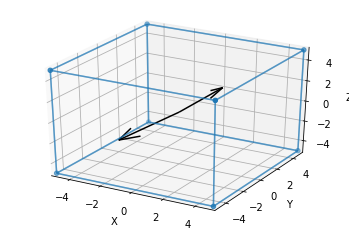

In [0]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# point of cube
points = np.array([[-5, -5, -5],
                      [5, -5, -5 ],
                      [5, 5, -5],
                      [-5, 5, -5],
                      [-5, -5, 5],
                      [5, -5, 5 ],
                      [5, 5, 5],
                      [-5, 5, 5]])

# vector
a = np.array((0, 0))
b= np.array((0, 0))
c = np.array((0, 0))
u = np.array((0, -4))
v = np.array((5, 0))
w = np.array((0, -4))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(a, b, c, u, v, w, color='black')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])

r = [-5,5]

X, Y = np.meshgrid(r, r)
one = np.array([5, 5, 5, 5])
one = one.reshape(2, 2)


ax.plot_wireframe(X,Y,one, alpha=0.5)
ax.plot_wireframe(X,Y,-one, alpha=0.5)
ax.plot_wireframe(X,-one,Y, alpha=0.5)
ax.plot_wireframe(X,one,Y, alpha=0.5)
ax.plot_wireframe(one,X,Y, alpha=0.5)
ax.plot_wireframe(-one,X,Y, alpha=0.5)
ax.scatter3D(points[:, 0], points[:, 1], points[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [0]:
np.ones(4)

array([1., 1., 1., 1.])

# ***

(-5.0, 5.0)

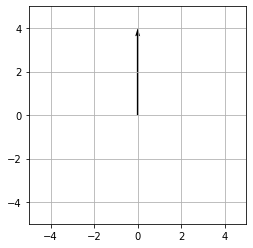

In [0]:
from mpl_toolkits.mplot3d import axes3d

X = np.array((0))
Y= np.array((0))
U = np.array((0))
V = np.array((4))

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V,units='xy' ,scale=1)

plt.grid()

ax.set_aspect('equal')

plt.xlim(-5,5)
plt.ylim(-5,5)

(-1.0, 1.0)

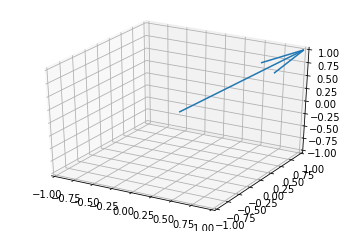

In [0]:
from mpl_toolkits.mplot3d import axes3d

X = np.array((0))
Y= np.array((0))
Z = np.array((0))
U = np.array((1))
V = np.array((1))
W = np.array((1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

(0.0, 5.0)

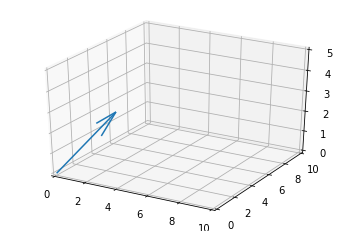

In [0]:
from mpl_toolkits.mplot3d import axes3d

vx_mag = v_mag * l
vy_mag = v_mag * m
vz_mag = v_mag * n
x = 0; y = 0; z = 0

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(x, y, z, vx_mag, vy_mag, vz_mag)
ax.set_xlim(0, 10); ax.set_ylim(0, 10); ax.set_zlim(0, 5)